In [1]:
%matplotlib inline

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.model_selection import train_test_split

<h1>
   <font color='#45101c'>
       The softmax function.Gradient descent over Cross-entropy Loss.
    </font>
</h1> 
<h3>
    <font color='#26080f'>
      (More Math Less Code)
      
  </font>
</h3>    
 <h5>
    <br> <br> <br>
    <font color='blue'>
     author : daodeiv (David Stankov) 
     </font>
  </h5>  

<h2>
   <font size="3" color='#263a61'>
      .
    </font>
</h2> 
<h5>

   <font size="3" color='#263a61' >
    $\;\;\;\;$  What is the Softmax function and how it works? <br>
   $\;\;\;\;$ Which function is used  as  Loss Error  in Softmax regression? <br> <br>
    This notebook has a mathematical proof and derivation of the formula for the Gradient Descent algorithm which is applied to cross-  entropy loss or so-called Softmax Loss in order to fit the estimator parameters.The notebook  contains a simply   implentation of Gradient descent. This paper is focused on math issues related to Multiclass classification used in Logistic regression and  Neural networks as well.
    </font>     
</h5>    


<h1>

   <br>
   <font size="2" color='#263a61'>
       $\; \; $   The standart softmax function $\sigma: \; \Re^k \; \rightarrow \; \Re^k $ is defined by formula : <br>
    

</font>   
  <font size="5" color='#454214' > $$\sigma(z)_i= \frac{e^z_i}{\sum_{j=1}^n e^{z}_{j}}$$  
</font> 
<br>

<font size="3" color='#263a61' > 
    The softmax function  takes as an input a vector $\vec z$ with $K$ number of component, and normalized it into  a  probability distribution consisting of  $K$ number of probabilities proportional to exponentials of input values.That is, prior to applying softmax function some vector components could be negative or greater than one and  might not sum up to 1.
Furthermore more the larger input components correspond to larger probabilities. 
</font>    
<br> <br>     
 </h1>     

<h2>
   <font color='#45101c'>
      .
    </font>
</h2> 


 <h6> <font size="2" color='#263a61' >  $\; \; $ Before we getting deeper into the above equation, we gonna generate our learning data. The data consist of records contains different types of vehicle together with their physical sizes. Since our purpose is to diving into the concepts of Softmax (not to show great predictions) the dataset is very simple and we would be able to do prediction using only the power of our brain without any ML algorithms. The simplicity of the dataset will help us to easier understand the math concepts behind softmax easier. 
    </font> 
  </h6>
<br>
<h5>
<font size="2" color='#263a61' > 
        Let to generate the training data : <br>
</font>    
</h5>  

In [3]:
#generate  records refer to tractor label with random physical size between [4,5] 
tractor_dataframe= pd.DataFrame(data=np.random.random((30, 3))+4,columns = ['x_size','y_size','z_size'])
tractor_dataframe['label'] =pd.DataFrame( np.full((1,30 ), 'Tractor').T)

#generate  records refer to car label with random physical size between [1,2]  
car_dataframe= pd.DataFrame(data=np.random.random((30, 3)) + 1,columns = ['x_size','y_size','z_size'])
car_dataframe['label'] =pd.DataFrame( np.full((1,30 ), 'Car').T)

#generate  records refer to car label with random physical size between [2,3]  
bus_dataframe= pd.DataFrame(data=np.random.random((30, 3))+2,columns = ['x_size','y_size','z_size'])
bus_dataframe['label'] =pd.DataFrame( np.full((1,30 ), 'Bus').T)

# joint each data frame into  one
data = tractor_dataframe.append(bus_dataframe).append(car_dataframe)
data = pd.get_dummies(data) 
data


,x_size,y_size,z_size,label_Bus,label_Car,label_Tractor
0,4.200743,4.131306,4.255998,0,0,1
1,4.149941,4.838548,4.218311,0,0,1
2,4.787533,4.986217,4.901542,0,0,1
3,4.506791,4.950477,4.686618,0,0,1
4,4.832195,4.577499,4.156847,0,0,1
...,...,...,...,...,...,...
25,1.421212,1.615876,1.537319,0,1,0
26,1.544604,1.663653,1.425982,0,1,0
27,1.896910,1.798983,1.442927,0,1,0
28,1.203042,1.960941,1.309985,0,1,0


<br> <br>
<h7>
<font size="2" color='#263a61' > 
The label values label_car,label_bus, and label_tractor are represented as one-hot encoding variable (dummies) in order to be convenient for mathematical manipulation or just to be used in mathematical equations.
    </font>
</h7>    
<br><br>    

<h5>
<font size="3" color='#263a61' > 
       Let to see the scatter plot of data.  
</font>    
</h5>  

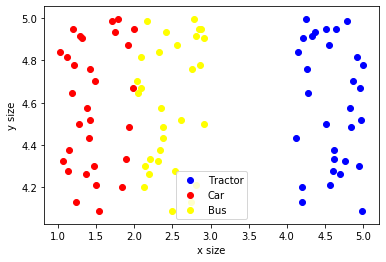

In [4]:
plt.scatter(tractor_dataframe['x_size'],tractor_dataframe['y_size'],label='Tractor',color='blue')
plt.scatter(car_dataframe['x_size'],tractor_dataframe['y_size'],label='Car',color='red')
plt.scatter(bus_dataframe['x_size'],tractor_dataframe['y_size'],label='Bus',color='yellow')
plt.xlabel('x size')
plt.ylabel('y size')
plt.legend()

In [5]:
x_train = np.array(data.drop(['label_Bus','label_Car','label_Tractor'], axis = 1)) # gets the target label variables
y_train = np.array(data[['label_Bus','label_Car','label_Tractor']]) # gets feature variables 
X_train, X_test, y_train, y_test = train_test_split(x_train,y_train, test_size=0.33, random_state=42) #separats into test and train samples 

print('shape of x train (n,m)', X_train.shape)
print('shape of y label (n,k)', y_train.shape )

shape of x train (n,m) (60, 3)
shape of y label (n,k) (60, 3)


<h1>
<br> <br>
<font size="2" color='#263a61' > 
$\; \; \; $In softmax regression we replace sigmoid function by so-called softmax function 
          $\phi_{softmax (.)}$. Where we difine the $z$ input as : 
 </font> 
 <br> <br>
 <font size="3" color='#454214'>
     $$ z = w_1 x_1 + ...+w_nx_n +b = \sum_l^mw_lx_l +b = W^T +b$$
 </font>  
</h1> 

<h5>
 <font size="2" color='#263a61' > 
$\; \; \;\; \; \; \; \; \;\; \; \;\; \; \; \; \; \;\; \; \;\; \; \; \; \; \;\; \;\; \; \; \; \; \;\; \; \;\; \; \; \; \; \;$  where $W$ is the weight vector, $X$ is is the feature vector of 1 training example, and $b$ is bias unit (intercept)  
 </font>
 <br><br>
</h5>
<br> <br>
<h1>
<font size="2" color='#263a61' > 
 $\;\;\;$Now,softmax function computes the probability that this training example $x^{(i)}$ belongs to class j given the weight $w$ and  input $z^{(i)}$. <br>
 So we compute the probability $p(y=j | x^{(i)};W_j)$ for each class label in j=1,...,k..Note the normalization term in the denominator which causes these class probabilities to sum up one. Our training sample consist of $(n_{samples} ,m_{features})$ = (60,3) and label consist of  are ( k_{classes} ) =  (3)
therefore  the weight matrix is $m\times k = 9$ or  $(m_{features},k_{classes}(probabilities) = (3 ,3)$ dimensional. <br> 
To compute the net input $z$, we mutiply feature matrix with weight matrix  $(n_{samples} ,m_{features})\times (m_{features} ,k_{classes})\; (60,3)\times(3,3) $ wich yields a $60 \times 3 $ to wich we then add the bias unit.Mathematicaly look like this:
 </font> 
 </h1>
 

<br> <br>
<h7>
<font size="2" color='#263a61' > 
$\; \; \; $ weight matrix  $W$ and bias (intercept) $B$ $X$ training data: 
</font>
    
<br> <br>
<font size="2" color='#454214' >
   $\;\;\;\;\; W= \begin{bmatrix} weight_1\rightarrow class \; 1(bus) \\ weight_2\rightarrow class\;  2(car) \;   \\ weight_3\rightarrow class \;3(tractor) \;  \end{bmatrix} =
    \begin{bmatrix} \vec w_1 \\  \vec w_2\  \\ \vec w_3  \end{bmatrix} =\begin{bmatrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \\ w_{31} & w_{32} & w_{33} \end{bmatrix}  $ <br> <br> <br>
     $\;\;\;\;\; B= \begin{bmatrix}  b_1 \\  b_2\  \\  b_3  \end{bmatrix}\;\;\;  X = \begin{bmatrix} x_{11} &  x_{12} & x_{13} \\  x_{21} &  x_{22} & x_{23} \\ ... & ... & ... \\ x_{n1} &  x_{n2} & x_{n3} \end{bmatrix}$
 <font>   
    
 </h7>    

 <font size="2" color='#263a61' > 
$\; \; \; $ and net input Z: 
</font> 

<font size="2" color='#454214' >
        $$ z_{ij} = \sum_l^3 x_{ip} w_{jp} + b_j $$
</font>
<br>
 <font size="2" color='#263a61' > 
$\; \; \; $  written in matrix form : 
    <br>
</font> 
<font size="3" color='#454214' >
     $$ Z = XW^{T} +b $$ <br> <br>
</font>     
<br>
<font size="2" color='#454214' >
     $$ Z = 
    \begin{bmatrix} x_{11} &  x_{12} & x_{13} \\  x_{21} &  x_{22} & x_{23} \\ ... & ... & ... \\ x_{n1} &  x_{n2} & x_{n3} \end{bmatrix} \times \begin{bmatrix} w_{11} & w_{21} & w_{31}  \\ w_{12} & w_{22} & w_{32} \\  w_{13} & w_{23} & w_{33}\end{bmatrix} + \begin{bmatrix}  b_1 \\  b_2\  \\  b_3  \end{bmatrix}  =   \begin{bmatrix} z_{11} &  z_{12} & z_{13} \\  z_{21} &  z_{32} & z_{33} \\ ... & ... & ...  \\ z_{n1} &  z_{n2} & z_{n3}  \end{bmatrix} $$ <br>
</font>    

<h7>
<font size="2" color='#263a61' > 
    $\; \; $In softmax regression settings, we are interested in multi-class classification and so the label y can take many values rather then only two. Thus in our training  we have $k_i\ in {1,2,3}$.
Given a test input x, we want our hypotesis to estimate the probability  $P(y=k|x_i)$ (y=k_i), i.e prediction of one label ,accoring to one samle(row) x_i) for each value of $k = {1,2,3}$ i.e we want to estimate the probability of class label taking on each of the $K$ different posible values. Thus, our hypotesis will output a K-dimensianal (3) vectors (whose element sum up to 1) giving us our K estimated probabilities. Concretely, our score(hypotesis) function $f(x,W)$ takes the form : <br>
  </font> 
  <br>
</h7>
 <font size="2" color='#454214'>  
   $$ f(x|W) = \begin{bmatrix} P(y=1 |x;W) \\  P(y=2 |x;W)  \\ ... \\ P(y=n |x;W)  \end{bmatrix} = 
 \frac{1}{\sum_{j=1}^k exp(W_j^Tx)} = \begin{bmatrix} exp(W_1^Tx) \\  exp(W_2^Tx)  \\ ... \\ exp(W_n^Tx)  \end{bmatrix}$$
 </font>

 <h5>
 <font size="2" color='#263a61' > 
$\; \; \; \; \; \;\; \; \;\; \; \;\; \; \;\; \; \;$ according to our generated dataset: 
</font> 
</h5>

<font size="2" color='#454214'>  
$$ f(x|W) = P = \begin{bmatrix} P(y=1 |x_{1j} ; w_{1j}) &  P(y=2 |x_{2j} ; w_{2j})  & P(y=3 |x_{1j} ; w_{3j}) 
        \\ ... &  ...  & ...
        \\ P(y=1 |x_{nj} ; w_{1j}) &  P(y=2 |x_{2j} ; w_{2j})  & P(y=3 |x_{1j} ; w_{3j})
        \end{bmatrix} = 
        \begin{bmatrix} \frac{e^{z_{11}}}{\sum_{1j}e^{z_{1j}}} & \frac{e^{z_{12}}}{\sum_{1j}e^{z_{1j}}} & \frac{e^{z_{13}}}{\sum_{1j}e^{z_{1j}}} 
        \\   \\ ... & ... & ...  \\
        \\    \frac{e^{k_{n1}}}{\sum_{j}^3e^{z_{nj}}} & \frac{e^{z_{n2}}}{\sum_{j}^3e^{z_{nj}}} & \frac{e^{z_{n3}}}{\sum_{j}^3e^{z_{nj}}}\end{bmatrix} $$ 
</font>        

<h7>
<font size="2" color='#263a61' > 
        $\;\;\;$The elements of $P$ we will called predictors $p_{ij}$ wich can be interpretated as probability i_th row element
        to be j_th categorical value.If $p_{1,2}$ means what is the probability that record one belongs to the label_ bus?
        Ofcourse, $p_{ij} \in [0,1]$ <br>
        Another way to express $p_{ij}$ : <br>  <br> 
        For example, the probability record one $X_1$ from dataset to be from class label $Y_2$ can be calculated in this way :
         </font> 
      <br> 
</h7>      

<font size="3" color='#454214'>  
      $$softmax(Z)_{12}=P(y=2 |x_{1j};\; w_{2j})=  \;p_{12}\;  = \frac{ e^{ ^{z_{12}} } }{ \sum_p^3 e^{z_{1p}}}=\frac{ e^{ (^{\sum_v^3 x_{1v}.w_{vj} + b_v }} )}{ \sum_p^3 e^{ ^ ({\sum_v^3 x_{1v}.w_{2v}} + b_2})}$$
  </font>

<h5>
<font size="2" color='#263a61' > 
     Let to see how an above considering can be applied concretely in our training dataset :
             First, let to define a weight vector $W$ <br> <br>
   
</font>   
 </h5>    
 </h7>
    <font color='#454214'>
 $$W = \begin{bmatrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \\ w_{31} & w_{32} & w_{33} \end{bmatrix}  =
            \begin{bmatrix} 0.75776811 & 0.6690284 & -0.02646755 \\
 -2.94775864 &  -3.06439323 & -2.14043833\\
  2.18999053 & 2.39536483 &  2.16690588 \end{bmatrix}$$
  <br> <br>
    $$B = \begin{bmatrix}  b_1 \\  b_2\  \\  b_3  \end{bmatrix} = \begin{bmatrix}  -0.15425504 \\ 18.81781451 \\ -18.66355947 \end{bmatrix} $$ <br> <br>
  </font> 
 </h7>
 
 <h5>
  <font size="2" color='#263a61' > 
     I've prepared weight vector $W$ and bias $B$ in advance, how? We will see later. <br> <br>
</font> 
   </h5> 

In [6]:
W = np.array([[ 0.75776811,  0.6690284 , -0.02646755],
              [-2.94775864, -3.06439323, -2.14043833],
              [ 2.18999053 , 2.39536483,  2.16690588]]) # define a weight matrix

B = intercept = np.array([ -0.15425504 , 18.81781451, -18.66355947])  #bias vector or intercept 

In [7]:
def sofmax(X_data, W_weight, Bias):
    '''
    softmax function  
    takes :
    X = training data
    W =  weight matrix
    b = bias vector (intercept) 
    return :
      softmax for every z unit e^{k_ij}/(e^{k_i1}+e^{k_i2}+e^{k_i3})
    '''
    #dot product between X_data matrix  and tranposed Weight_ matrix added to Bias  gives matrix each z_ij
    Z = X_data.dot(W.T)+B 
    
    #return matrix cosist of exponentials Z input net matrix  s_i 
    exp_z = np.exp(X_data.dot(W.T)+B)
    
    #array with sum_i=Sum_k (e^z_{ik})
    sums=np.sum(exp_z, axis=1) 
    
    #return softmax(Z)_{ij}
    return (exp_z.T/sums).T 

In [8]:
print('original data label Y :  ')
print(y_train[1:10])
print('')
print("predicted data label Y' :")
print(np.around(sofmax(X_train,W,intercept)[1:10],2))

original data label Y :  
[[0 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]]

predicted data label Y' :
[[0.02 0.98 0.  ]
 [0.01 0.   0.99]
 [0.98 0.   0.02]
 [0.97 0.03 0.  ]
 [0.01 0.   0.99]
 [0.98 0.01 0.01]
 [0.96 0.04 0.  ]
 [0.   0.   1.  ]
 [0.03 0.97 0.  ]]


<h7>
<font size="2" color='#263a61' > 
     From $Y'$ output let to consider the first row : <br> <br>
            $Y'_{11} = 0.01 \rightarrow  $ has  0.1% chance that row one belongs to class 1(BUS) <br> 
            $Y'_{12} = 0.98 \rightarrow  $ has 98% chance that row one belongs to class 2(CAR) <br> 
            $Y'_{13} = 0.01 \rightarrow  $ has 0.1% chance that row one belongs to class 3(TRACTOR) <br> <br>
            That means record $X_1$ belongs to class Car, because has the 90% chance, which is the largest. <br> <br> <br>
      If we compare     $Y$ and $Y'$ we will notice that our prediction has 100% accuracy. <br>
But, how have I  found a weight matrix $W$ and bias &B&.I just used the LogisticRegression from scikit-learn, and took the coefficients, but now we gonna define a Loss function ant its optimization in order to find the weght $W$ and bias $\vec b$. 
         </font>     
</h7>         

<h7>
 <font size="2" color='#263a61' > 
     <br> <br>
     $\;\;\;$ Now we are going to define a loss function for :
     </font>
     <font color='#454214'>
            $$(1) \; \; \; \; \; \;p_{ij}=softmax(Z)_{ij}=\frac{e^{z_{ij}}}{\sum_l^k e^{z_{il}}} $$ <br>
            $$\; \; \;z_{ij} = \sum_p^3 x_{ip} w_{jp} + b_j $$
   </font>
   <br>
   <font size="3" color='#263a61' > 
   $\;\;\;$ The loss function for Softmax regression is called Cross-Entropy Loss or Sofmax Loss and it is defined like that:
   <br>
   <br>
   <font size ="4" color='#45101c'>
    $$ (2) \;  \; \;L(W,b)=-\sum_i^n\sum_j^k y_{ij} \log (sofmax(Z)_{ij})$$ <br> <br>
     </font>
   </h7>
   <h5>
   <font size="2" color='#263a61' > 
       $\;\;\;\;\;\;$Where n is a count of records , $y_{ij}$ is label value of i_th record j_th class, $softmax(Z)_{ij}$ predicited label value  $Y'_{ij}$ and $W$ is weight matrix and $b$ bias. 
    </font>
    </h5>
    <h7>
       <br> <br>
    <font size="2" color='#263a61' > 
     Our purpose in to fit parameters  $w_{ij}\in W$ and $b_j$ according to 
 a training data $X$  and a label data $Y$ in order to make the best prediction.To do that we will apply Gradient descent as a regression technique over Softmax loss function.The eq.(2) is the function of all weights $w_{ij}$, bias $b_j$ all training data x and label data y.     
    </font>

<h7>
 <br> <br>
        <font size="2" color='#263a61' >
            First, We gonna introduce some math technics which will make our work easier, and we will find derivates of some function which will be extremely useful in the process of finding of $\nabla L(W,b)$. <br> <br>
            For simplicity in the summation process of indices, we will introduce a <a href='http://physics.csusb.edu/~prenteln/notes/vc_notes.pdf'>Kronecker symbol</a> .<br>
    </font>    
</h7> 

 <h3>
     <font size="2" color='#454214'>
       $$\delta_{ij} =    
         \begin{equation}
   \begin{Bmatrix} 
   1 & if \; i=j  \\
   0 & if \; i\ne j  
    \end{Bmatrix} 
\end{equation}$$
  <br><br>
          $$ \delta_{ij} = \begin{bmatrix} 1 & 0 & 0  \\ 0 & 1 & 0 \\  0 & 0 & 1 \end{bmatrix}$$
  </font>
 </h3>    
 <h7>
 <br> <br>
        <font size="2" color='#263a61' >
           In many places in the coming sum operations over indexes we will miss the $\sum$ symbol, just it will be avoided(hidden) according to the .<a href='https://en.wikipedia.org/wiki/Einstein_notation'>Einstein summation convention</a> .<br>
       For example, the equation. 
    </font>
    <font size="2" color='#454214'>
       $$z_{ij} = \sum_p^3 x_{ip} w_{jp} + b_j $$ 
 </font>   
  <font size="2" color='#263a61' >
by applying the  Enstein convetion we could rewrite it as : <br>
  </font>
  <br>
  <font size="2" color='#454214'>
         $$z_{ij} = x_{ip} w_{jp} + b_j$$  
   </font>     
   <br>
   <font size="2" color='#263a61' >
   The sign $\sum_p^3$ is miss.The sumation over p  is implied(by default) because p is repeated twice.Every time when there are repeatable indices that is the indicator for exist of $\sum$  which is just missing(The sum sign  is not written).
    </font>    
</h7> 

<h7>
 <font size="2" color='#263a61' >
  Our goal is to apply Gradient descent to eq.(2), it is defined as :
     
 </font>
  <br> <br>
   <font size ="4" color='#45101c'>
    $$(2) \;  \; \;  \; \; \; \;
   \begin{matrix} w_{ij} = w_{ij} - \nabla w_{ij}L(W,b) \\  \\ b_{j} = b_j - \nabla b_{j}L(W,b)
       \end{matrix} $$
   
  </font> 
</h7> 


<h7>
 <font size="2" color='#263a61' >
  Our goal is to apply Gradient descent to eq.(2), it is defined as :
     
 </font>
  <br> <br>
   <font size ="4" color='#45101c'>
    $$(3) \;  \; \;  \; \; \; \;
   \begin{matrix} \nabla w_{ij}L(W,b)   &=  -\frac{\partial}{\partial w_{ij}}\Big(\sum_k^m\sum_n^n y_{mn} \log {p_{mn}}\Big) \\  \\
     \nabla b_{j}L(W,b) & =- \frac{\partial}{\partial b_{j}}\Big(\sum_k^m\sum_n^n y_{mn} \log{p_{mn}}\Big)
       \end{matrix} $$
   
  </font> 
</h7> 



<font size="2" color='#263a61' >
        $$ \;\;\; where\; p_{mn} = softmax(Z)_{mn}$$
   </font>
   

<h5>
 <font size="3" color='#263a61' >
  Be ready for a hard part !!!
     
 </font>
</h5> 
 

<h1>
 <font size="2" color='#263a61' >
   Now we gonna to resolve the eqs.(3) : <br>
     
     
 </font>

<h4>
     <font size="4" color='#454214'>
         $\;\;\;\;\;\;\;\;\;\;\;\;\frac{\partial L}{\partial w_{ij}}=-\frac{\partial}{\partial w_{ij}}\Big(\sum_k^m\sum_n^n y_{mn} \log {p_{mn}}\Big)$
   <br><br>
   
   $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;=\sum_k^m\sum_n^n y_{mn}\frac{\partial \log {p_{mn}}}{\partial w_{ij}} $ 
   
   <br><br>
   $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;=\sum_k^m\sum_n^n\frac{y_{mn}}{p_{mn}}\frac{\partial  p_{mn}}{\partial w_{ij}} $
   <br><br>
   $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;=\sum_k^m\sum_n^n \frac{y_{mn}}{p_{mn}}\frac{\partial  p_{mn}}{\partial z_{vp}}\frac{\partial  z_{vp}}{\partial w_{ij}} $
   </font>
   <br> <br>
   <font size="3" color='#263a61'> $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;since \; z_{vp} = f(w_{pi}) \Rightarrow \frac{\partial  z_{vp}}{\partial w_{ij}} = 0\; if \; p\ne i \;\; we \; can \; write \; \frac{\partial  z_{vp}}{\partial w_{ij}}=\delta_{pi}\frac{\partial  z_{vp}}{\partial w_{ij}}$
    $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;and \; p_{mn} = f(z_{mv}) \Rightarrow \frac{\partial  z_{vp}}{\partial w_{ij}} = 0\; if \; m\ne v \;\; we \; can \; write \; \frac{\partial  p_{mn}}{\partial z_{vp}}=\delta_{mv}\frac{\partial  p_{mn}}{\partial z_{vp}}  $ <br>
     $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;replacing\; in \;equation\; we\; achieve  $
 </font>

<h4>
     <font size="4" color='#454214'>
         $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;=\sum_k^m\sum_n^n \frac{y_{mn}}{p_{mn}}\delta_{mv}\frac{\partial  p_{mn}}{\partial  z_{vp}} \delta_{pi}\frac{\partial  z_{vp}}{\partial w_{ij}} $ <br> <br>
         </font>
         <font size="3" color='#263a61'>
    $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; using\; \delta\; proprties\; we\; can\; write$ </font>
    <font size="4" color='#454214'> <br> <br>
     $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;=\sum_k^m\sum_n^n \frac{y_{mn}}{p_{mn}}\delta_{mm}\delta_{ii}\frac{\partial  p_{mn}}{\partial z_{mi}}\frac{\partial  z_{mi}}{\partial w_{ij}} $ </font> <br> <br>
    <font size="3" color='#263a61'>
    $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; since\; there \;is\; no \sum \;respect \;to \; i \;and \;m \; we\; can\; remove\;\delta_{ii}\;and\; \delta_{mm}$ </font>
    <font size="4" color='#454214'> <br> <br>
     $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;=\sum_k^m\sum_n^n \frac{y_{mn}}{p_{mn}}\frac{\partial  p_{mn}}{\partial z_{mi}}\frac{\partial  z_{mi}}{\partial w_{ij}} $ </font> <br> <br>
  </font>

<h1>
 <font size="2" color='#263a61' >
   Let to focus on $\frac{\partial  p_{mn}}{\partial z_{mi}}$ and $\frac{\partial  z_{mi}}{\partial w_{ij}}$ <br>
  </font>
</h1> 
<br>
<h4>
     <font size="3" color='#454214'>
          $\;\;\;\;\;\;\;\;\;\;\;\; \frac{\partial  p_{mn}} {\partial z_{mi}}=\frac{\partial\frac { e^{z_{mn}} }{ \sum_ke^{z_{mk}}} }{\partial z_{mi}}$ <br> <br>
          $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;=\frac{1}{(\sum_ke^{z_{mk}})^2}\times \Big(\frac{\partial e^{z_{mn}} }{\partial z_{mi}}\times(\sum_ke^{z_{mk}}) - e^{z_{mn}}\times\frac{\partial (\sum_ke^{z_{mk}})}{\partial z_{mi}}  \Big)$ <br> <br>
           

<h4>
     <font size="4" color='#454214'>
          $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;=\frac{e^{z_{mn}}\times\frac{\partial z_{mn}}{\partial z_{mi}}}{\sum_ke^{z_{mk}}} - \frac{e^{z_{mn}}}{\sum_ke^{z_{mk}}}\times\frac{ \sum_k e^{z_{mk}} \frac{ \partial z_{mk}}{\partial z_{mi}}}  {\sum_ke^{z_{mk}}}$
   </font>
</h4>   

<font size="3" color='#263a61'>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; since\; \frac{\partial z_{mk}}{\partial z_{mi}}=0\;if\;k\ne i\;\frac{\partial z_{mk}}{\partial z_{mi}}=1\;ifk = i\;\Rightarrow \frac{\partial z_{mk}}{\partial z_{mi}}=\delta_{ki}$ </font>

<h4>
     <font size="4" color='#454214'>
          $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;=\frac{e^{z_{mn}}\times \delta_{ni} }{\sum_ke^{z_{mk}}} - \frac{e^{z_{mn}}}{\sum_ke^{z_{mk}}}\times\frac{ \sum_k e^{z_{mk}}\delta_{ki}}  {\sum_ke^{z_{mk}}}$ <br><br>
          $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;=\frac{e^{z_{mn}}\times \delta_{ni} }{\sum_k e^{z_{mk}}} - \frac{e^{z_{mn}}}{\sum_ke^{z_{mk}}}\times\frac{ \sum_k e^{z_{mk}}\delta_{ki}}  {\sum_ke^{z_{mk}}}$ <br><br>
          $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;=\frac{e^{z_{mn}}\times \delta_{ni} }{\sum_ke^{z_{mk}}} - \frac{e^{z_{mn}}}{\sum_ke^{z_{mk}}}\times\frac{ \sum_k e^{z_{mi}}\delta_{ii}}  {\sum_ke^{z_{mk}}}$ <br><br>
          $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;=\frac{e^{z_{mn}}\times \delta_{ni} }{\sum_ke^{z_{mk}}} - \frac{e^{z_{mn}}}{\sum_ke^{z_{mk}}}\times \frac{ e^{z_{mi}}}{\sum_ke^{z_{mk}}}$ <br><br>
   </font>
</h4>   

<font size="3" color='#263a61'>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; from \;eq.(1)\;\Rightarrow\; \frac{ e^{z_{mn}} }{ \sum_k e^{z_{mk} } }=p_{mn} \;and \;frac{ e^{z_{mi}} }{ \sum_k e^{z_{mk} } }=p_{mi}  $</font>

<h4>
     <font size="4" color='#454214'>
          $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;=p_{mn}\times \delta_{ni} - p_{mn}\times p_{mn}p_{mi}$ <br><br>
          $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;=p_{mn}(\delta_{ni} -  p_{mi})$ <br><br> <br>
          <font size ="5" color='#45101c'>
               $$(3) \;\;\;\;\;\frac{\partial  p_{mn}} {\partial z_{mi}} = p_{mn}(\delta_{ni} -  p_{mi}) $$
  </font>     

<h4>
     <font size="5" color='#454214'>
 $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\frac{\partial  z_{mi}}{\partial w_{ij}} =\frac{\partial ( \sum_k  x_{mk}w_{ki})}{\partial w_{ij}}= \frac{ \sum_k z_{mi} x_{mk}\partial w_{ki}}{\partial w_{ij}}$ <br>
 $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;=  \sum_k  x_{mk}\frac{\partial w_{ki}}{\partial w_{ij}} $ <br>
 </font>
<font size="3" color='#263a61'>
 $!!!\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;  \frac{\partial w_{ki}}{\partial w_{ij}} = \delta_{kj}\;only\;direct\;verification\;can\; proof \;it$</font> <br>
<h4>
     <font size="4" color='#454214'> 
          $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;=  \sum_k  x_{mk}\delta_{kj} =\sum_k  x_{mj}\delta_{jj}=x_{mj}  $ <br>
  </h4>    

<h4>
 <font size ="5" color='#45101c'>
               $$(4) \;\;\;\;\;\frac{\partial  z_{mi}}{\partial w_{ij}} = x_{mj} $$   
</h4>        

<h7>
 <font size="2" color='#263a61' >
  Replacing eq.(3) and eq.(4) in $\frac{\partial L}{\partial w_{ij}}=\sum_k^m\sum_n^n y_{mn}p_{mn}\frac{\partial  p_{mn}}{\partial z_{mi}}\frac{\partial  z_{mi}}{\partial w_{ij}}$ we achieve : 
    </font>
 <h7>   
  <h4>
     <font size="3" color='#454214'>
         $\frac{\partial L}{\partial w_{ij}}=\sum_k^m\sum_n \frac{y_{mn}}{p_{mn}}\frac{\partial  p_{mn}}{\partial z_{mi}}\frac{\partial  z_{mi}}{\partial w_{ij}}=\sum_k^m\sum_n^n \frac{y_{mn}}{p_{mn}}p_{mn}(\delta_{ni} -  p_{mi})x_{mj}$<br><br>
     $ =\sum_k^m\sum_n y_{mn}(\delta_{ni} -  p_{mi})x_{mj} $
     $ =\sum_k^m\sum_n y_{mn}\delta_{ni} - \sum_k^m\sum_n^n y_{mn} p_{mi}x_{mj} $ <br> <br>
      $ =\sum_k^m\sum_n y_{mi}\delta_{ii} - \sum_k^m\sum_n y_{mn} p_{mi}x_{mj} $ <br> <br>
        $ =\sum_k^m y_{mi} - \sum_k^m\sum_n y_{mn} p_{mi}x_{mj} $
   </font>     
<font size="3" color='#263a61'> <br> <br>
 $!!!\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;y_{m1}+ ... +y_{mk}=1 \;\; because \;y_{mk}\; are\; dummies \;variable\;and\;their\; z\;\sum_m y_{mk}\;is\;always\;equal\;to\;1\;by\;deff.$</font> <br>
<h4>    
 <font size="3" color='#454214'> 
       $ =- (\sum_k^m y_{mi} - \sum_k^m 1. p_{mi}x_{mj} )= $
       $ =+ \sum_m  (p_{mi} - y_{mi} )x_{mj} )= $